<center>STAT 413</center>

<center>Phong Ho [1617975], Randal (R.J.) Bilak [1584507], Tristin Schlauch [1672573]</center>

------

In this project, we use many statistical methods to predict the number of protests that will happen in 2025 using the data provided. First, we begin by figuring out which factors are important for predicting protests by testing them via a method called parametric bootstrapping. Then, we will begin to use another method called Monte Carlo to make a 95% prediction interval about how many protests we might see. By doing this, we hope to make a good estimate of future protests and help us prepare for what might happen in 2025.

------

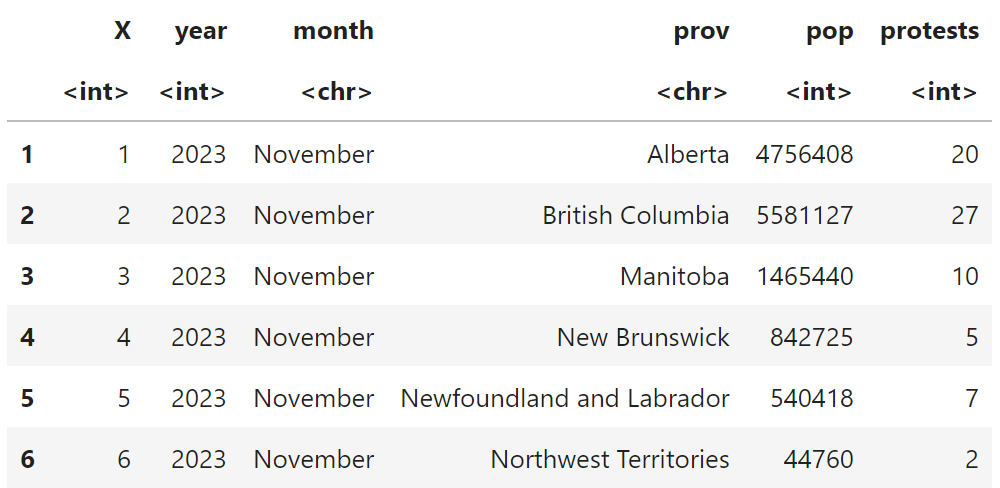

In the dataset, we have a total of 5 variables, one of which we aim to gain deeper insights into. The objective of this project is to create a prediction model, focusing on the variable "Protest," to forecast the number of protests that might occur in any given year with a certain level of confidence.

Firstly, we must undertake data cleaning and preprocessing. By using the head() function, it's evident that the "year" variable should ideally consist of categories representing different years rather than integers. Similarly, "month" and "provinces" are expected to be categorical rather than simple strings. To rectify this, we will proceed with the following procedures.

**Pre-Processing**

-------------------------------
First of the id section is to be removed as it adds redundancy. For variables that are meant to be in a category we may use the function

> as.factor()

and for the variables we wish to define as numeric instead of integers, we may use the function

> as.numeric()

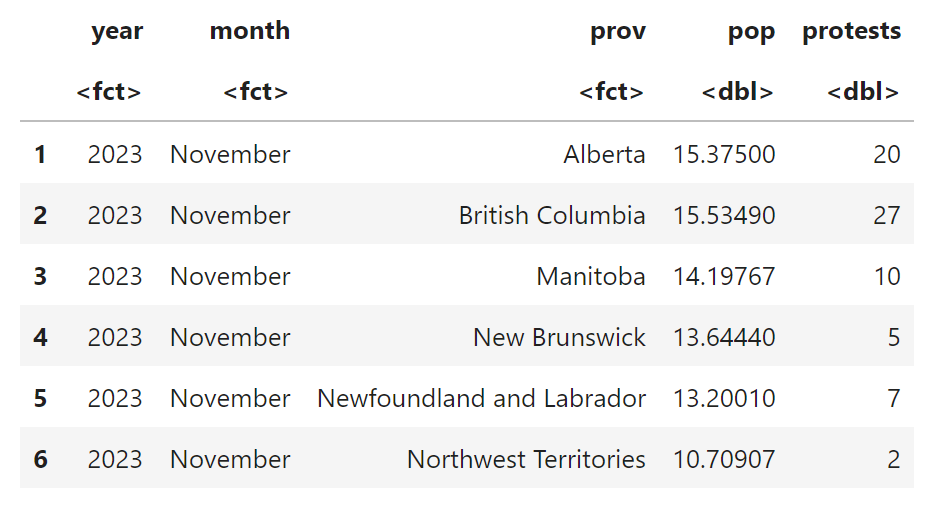

-----------------------------------
We may also mention that the population has values which are on a higher range of numbers compared to protest. So scaling down the population variable will make sure all the numeric in the data are on the same scale, which is important because it helps with comparing them easily and understanding the results better. It also makes the process of calculation more smooth. Another important reason to scale is that we are sure when population is 0, we expect the number of protests to be 0 which the function *log()* allows us to do.

We also want to look at how seasons affect protests compared to just looking at individual months. While focusing on seasons gives us a general idea of yearly trends, it means we lose some specific monthly details and might not be totally accurate because seasons can vary in length. When we leave out months from our model, we end up with a weird situation where the relationship between population and protests is inversly proportional, I.e., as population increases, our prediction of protests decrease. So, keeping months in our model is vital to preserve all necessary information.

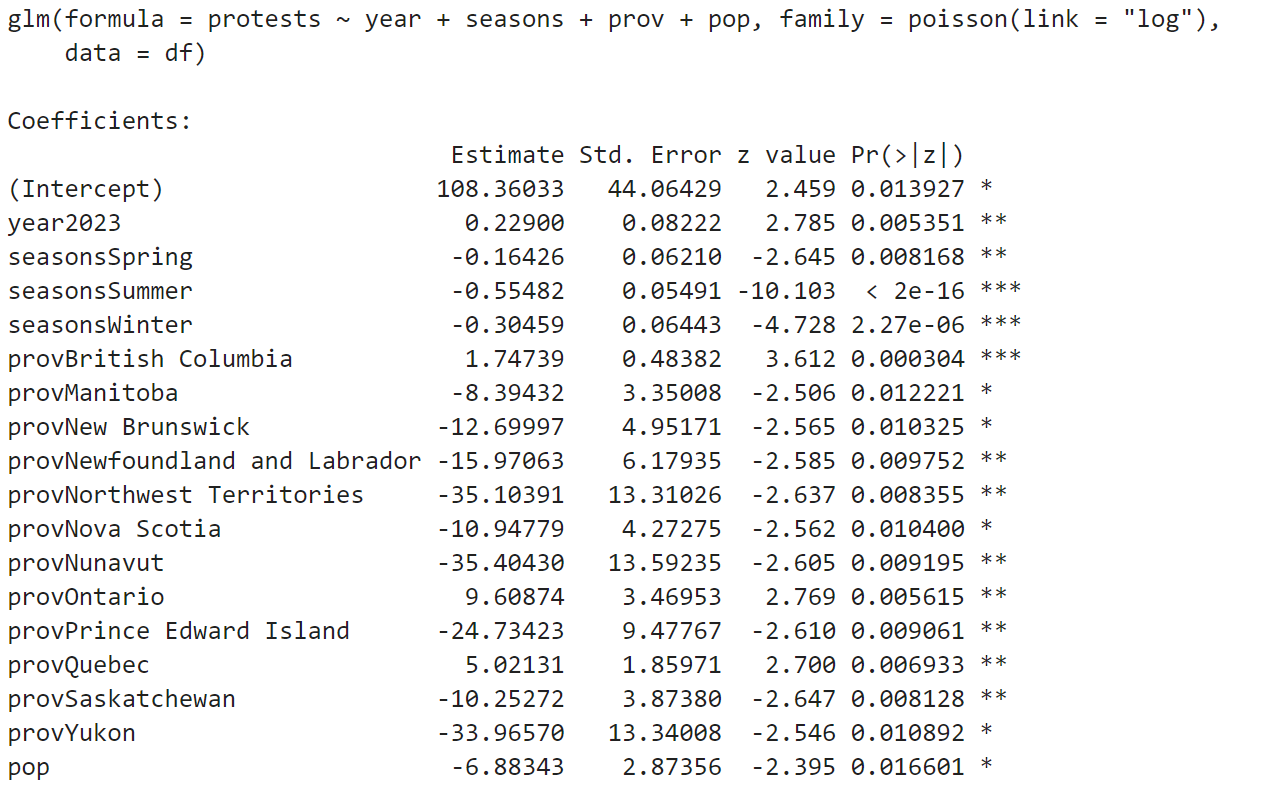

# Model Selection


------------------------------------------

Upon completing the data preparation phase, we are poised to select a suitable model. Our choice falls upon *Poisson Regression*, aimed at forecasting protest occurrences. Our model is comprised of four predictors: year, month, province, and population size. Leveraging historical data, these factors will aid in forecasting the frequency of protests in the future. Subsequently, after training the model, we will assess the significance of each variable and interpret the results of factors influencing protests.

__Fundamental of Poisson Regression:__

---------------------------

Poisson Regression models the expected count of events $Y$ as a function of predictor variables $X$ using the Poisson distribution:
$$
Y\sim Poisson(\lambda)
$$
Where $\lambda$ represents the expected count of events. The relationship between the predictor variables and $\lambda$ is modeled using the logarithm link function:

$$
log(\lambda) = \beta_0+\beta_1X_1+\beta_2X_2+ ... +\beta_kX_k
$$

where $\beta_0,\beta_1,...,\beta_k$ are the coefficients estimated by the regression and $X_1,X_2,...,X_k$ are the predictors. The interpretation of the coefficients is in terms of relative changes in the expected count of events, $\lambda$. For example, if $\beta_1$ ​ is positive, it indicates that for a one-unit increase in $X_1$​ , the expected count of events increases/decreases by a factor of $e^{\beta_1}$ with differences up to a sign change of $\beta_1$ ​, after holding other variables constant.

**Poisson Regression model:**

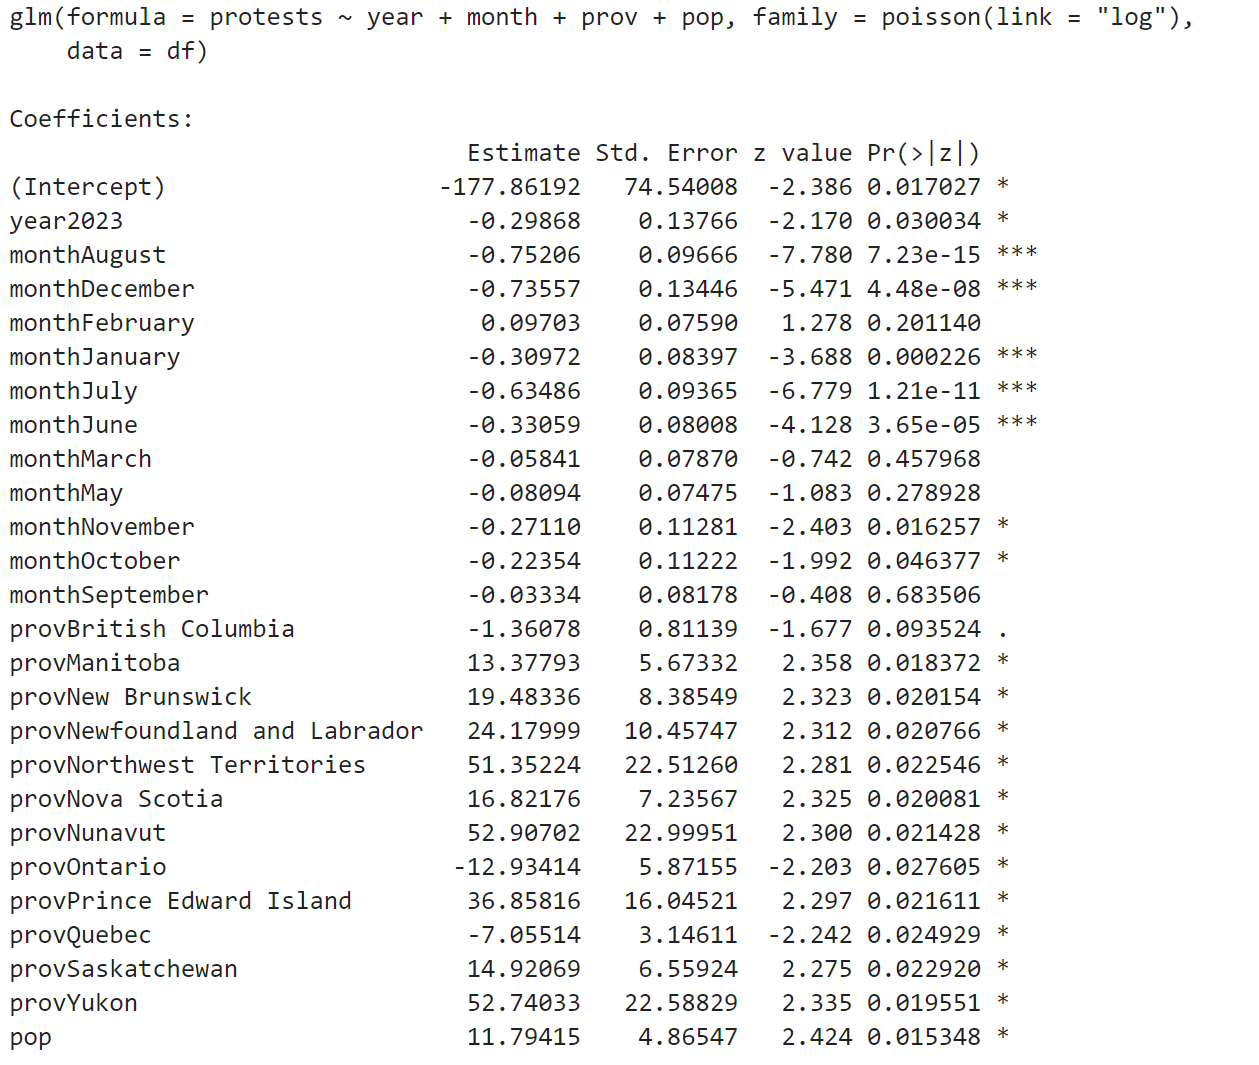

----------------------------------------
From the summary function, it's evident that when selecting a significance level of $\alpha = 0.05$, the variables: provBritish Columbia, monthSeptember, monthMay, monthMarch, and monthFebruary are deemed non-significant, meaning that we fail to reject the hypothesis:

$$
H_0: \beta_k = 0 \text{   vs.   } H_1: \beta_k \neq 0
$$

Conversely, the remaining variarexhibit signticance. Nonetheless, we intend to conduct another tedetermineertain the significance of each individual parameter through parametric bootstrapping. In the subsequent code snippet, a Poisson regression model is fitted to the data. This model estimates coefficients for the predictors (year, seasons, prov, pop). In this parametric bootstrap approach, rather than directly resampling from the dataframe, resampling is based on simulated data generated from the fitted Poisson regression model. By repeatedly fitting the model to these resampled datasets and calculating parameter coefficients, we can leverage the bootstrap parameters to estimate the sampling variability of the model parameters, construct confidence interandls, or assess uncertainty regarding the parameter estimates.

# Bootstrapping Parameters

-------------------------

Parametric bootstrapping for a Poisson regression model involves several key steps to estimate the uncertainty associated with the model's parameters. Initially, the Poisson regression model is fitted to the original dataset, establishing the relationship between predictors and the outcome variable, such as protest counts. Then, new datasets are generated through simulation, using the estimated parameters from the original model. Each new dataset is created by sampling from a Poisson distribution, with mean values equal to the predicted counts from the original model. Subsequently, the Poisson regression model is refitted to each of these resampled datasets, resulting in parameter estimates for each iteration. By repeating this process numerous times, a distribution of parameter estimates is obtained. From this distribution, standard errors and confidence intervals for each parameter can be calculated, providing insights into the uncertainty surrounding the model's estimates.

-------------------------
We used code to conducts bootstrap resampling to estimate confidence intervals for the parameters. Initially, we utilize the boot.ci() function from the boot package in R to compute percentile-based bootstrap confidence intervals (type = "perc") for the first parameter (index = 1) of the model. Then, the results are stored in a list named boot_ci_list. We iterate this process over an index = i where i ranges from 1 to 26, and print the outcomes. This procedure provides us with a 95% confidence interval for each parameter, where Beta 0 represents the intercept.

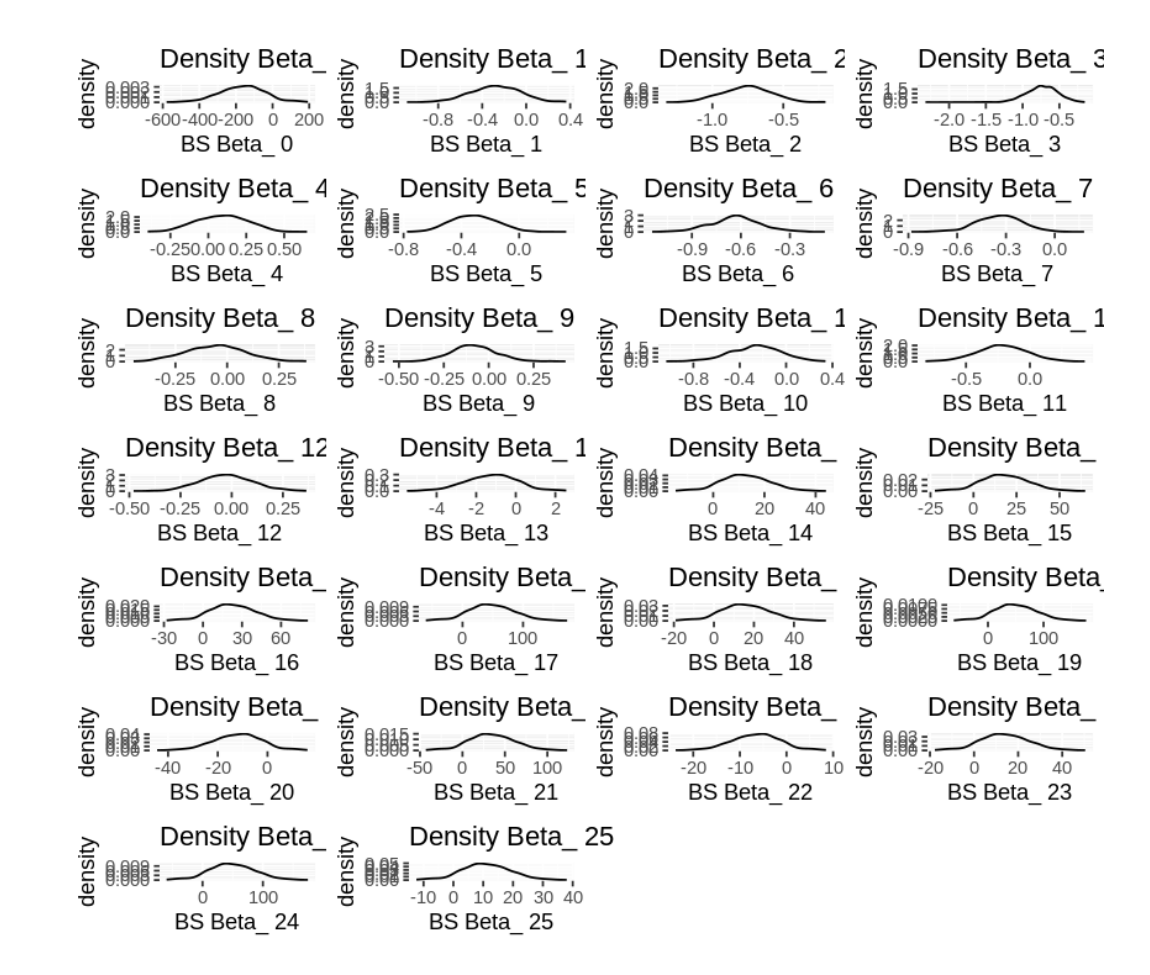

We can see this matrix plot of all bootstrapped parameter and see where 0 falls within the density plot to determine if its significant or not.

-----------------------------------

So according to the bootstrapped confidence interval, the parameters: $\beta_2,\beta_3,\beta_5,\beta_6,\beta_7$ are the only significant parameters which corresponds to the monthAugust, monthDecember, monthJanurary, monthJuly, monthJune, monthMarch variable. This is very different compared to what the summary Z-test has given us. Why?

The answer is that the issue with using Z-scores in Poisson Regression is the assumption of equidispersion where the $Y\sim\mathrm{Poisson}(\lambda)$ then $\mathrm{E}Y = \lambda$ and $\mathrm{Var}(Y) = \lambda$ are all equally the same ie, The model assumes that the variance of the **protest** is equal to the mean. However, in most realistic data it often exhibit greater variability, an overdispersion, than what would be expected under the Poisson distribution.

When overdispersion occurs, the assumption of equidispersion is violated, and the standard errors of the coefficients estimated by the Poisson Regression may be underestimated. As a result, Z-scores calculated using these standard errors may be inaccurate, leading to potentially misleading conclusions about the significance of predictor variables. Which we see is evident for example in the Population variable or **Beta_25**.

In context to Poisson Regression, alternative methods such as quasi-Poisson (Overdispersed Poisson Regression) or Negative Binomial Regression are often employed. These methods explicitly account for overdispersion by allowing the variance to exceed the mean. In such models, the significance and interpretation of predictor variables, including the population variable, may differ from those in standard Poisson Regression due to the adjustments made to accommodate overdispersion. In the Overdispersed Poisson Regression case, we add a "dispersion" parameter $\phi>0$.  Then, our random variable $Y$ will have 
$\mathrm{E}Z = \lambda$ and $\mathrm{Var}(Y) = \phi\lambda$. Just like the bootstrap, we can see the difference in parameter significance in the code below which almost lines up with bootstrapping significant parameters.

**Overdispersed poisson regression model:**

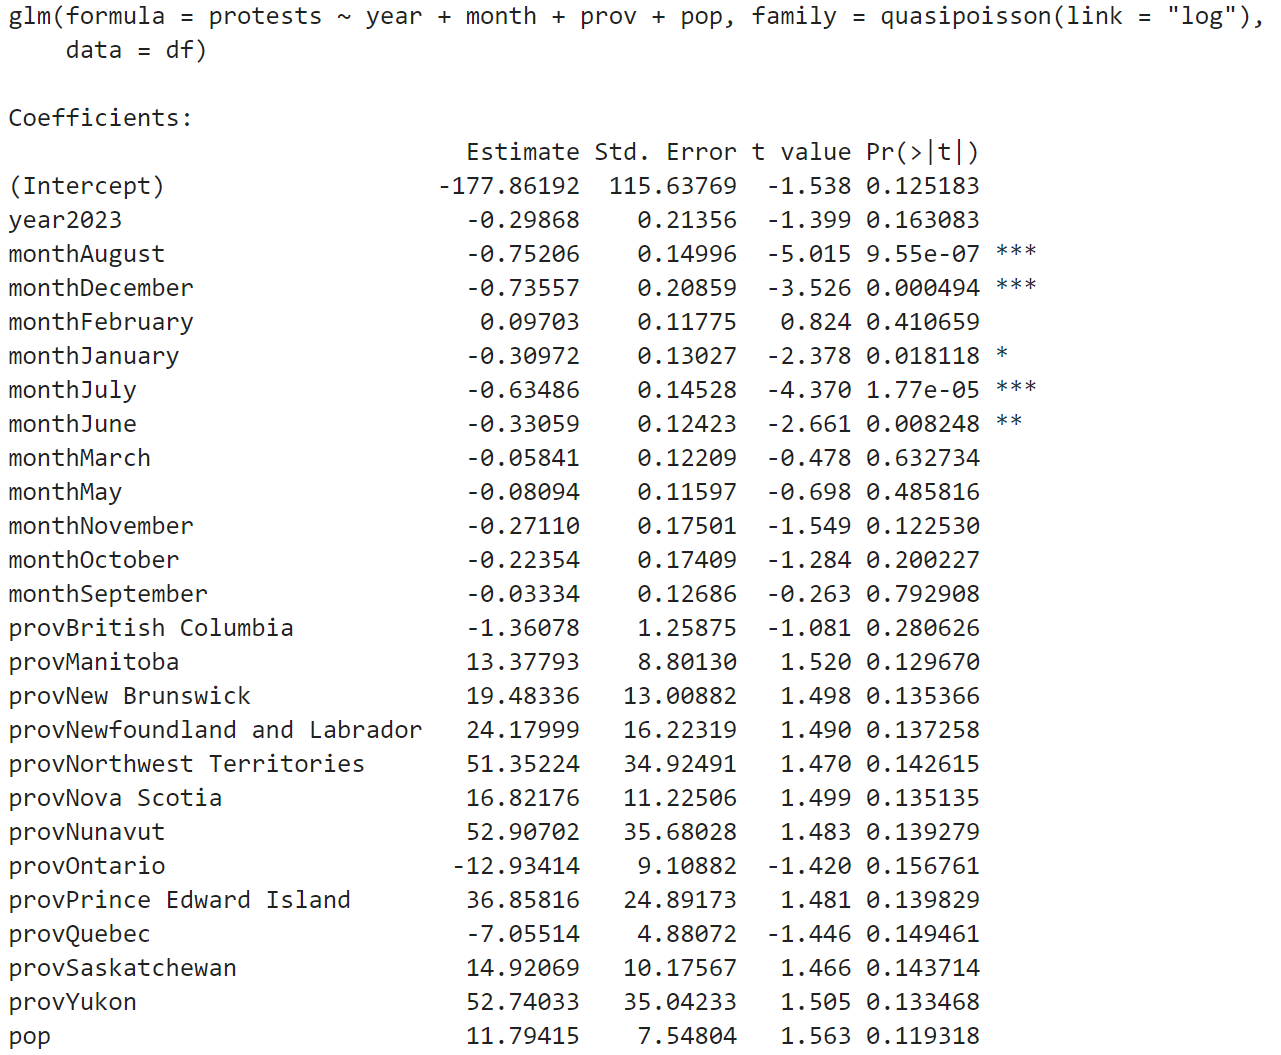

# Monte Carlo Prediction Interval

------------------------------

In this section of the project, we are using a method called Monte Carlo simulation to create 95% prediction bands for each province in 2025 for a given month of the year. Monte Carlo simulation is a way to generate several guesses based on a model. By doing this for each province, we can predict not just one outcome, but a range of possible outcomes, considering how uncertain things might be. This may help us make better plans and decisions for the upcoming year. Combining Monte Carlo simulation with prediction modeling lets us give more accurate predictions about what might happen in each province in 2025.

Before progressing to simulate from our model, we must make a change to year from *as.factor()* to *as.numeric()* because if we were to use categories like "2022" and "2023" for the "year" variable, the computer sees only those specific years and treats them as the only thing in the universe of that variable. This limited view might make it hard for the model to understand how things change over time, as it does not recognize "2025". But if we use numbers instead, the model can see the whole timeline from one year to the next. This helps it notice any trends or patterns happening over the years. So, by using numberical values, we make it easier for the model to predict what might happen in 2025 because it can understand the bigger picture of how things change over time.

To conduct this we use the code which consists of two functions tailored for predicting and visualizing predicted protests using a Poisson regression model. The *predict.protests* function accepts parameters such as province, month, year, population, and the number of simulations. It proceeds by fitting a Poisson regression model, predicting the expected number of protests, generating simulated protest counts based on the predicted lambda, calculating 95% prediction bands, and presenting summary statistics. On the other hand, the plot.hist function serves a similar purpose but emphasizes plotting, generating a histogram of the simulated protest counts for a specified province, month, and year. These functions enable us to forecast future protest counts and visualize their distribution via histograms.

To predict protest numbers for 2025, we need to input additional variables into our model. These include the month, population, and province, though we're examining all provinces regardless. For consistency, we've chosen July, as it holds significance with Canada's birthdate. However, determining population figures required careful consideration. Large deviations from original data could skew our predictions significantly. To address this, we opted for the mean logarithm of each province's population, rounding up to the nearest whole number. This method assumes a moderate increase in population across all provinces, approximating a rise by a factor of about $\approx e^x, 0 \le x \le 1$. This ensures our predictions remain plausible, while allowing for variability in population growth.

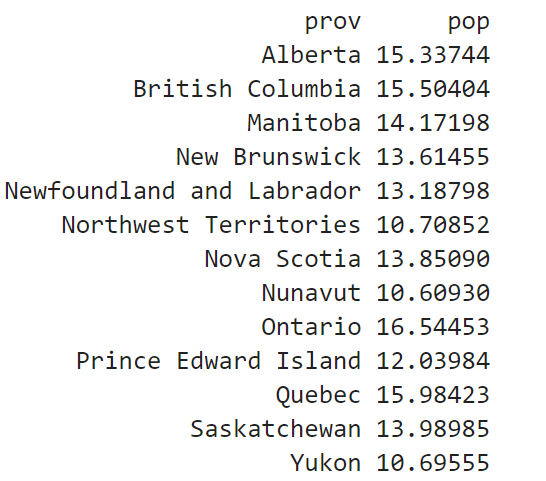

We then apply our code with a loop on all the pronvinces and their respecitive population in July 2025. The outcome is given as a plotted histogram and a summary of the simulation alongside with lower/upper bounds of the 95% prediction interval.

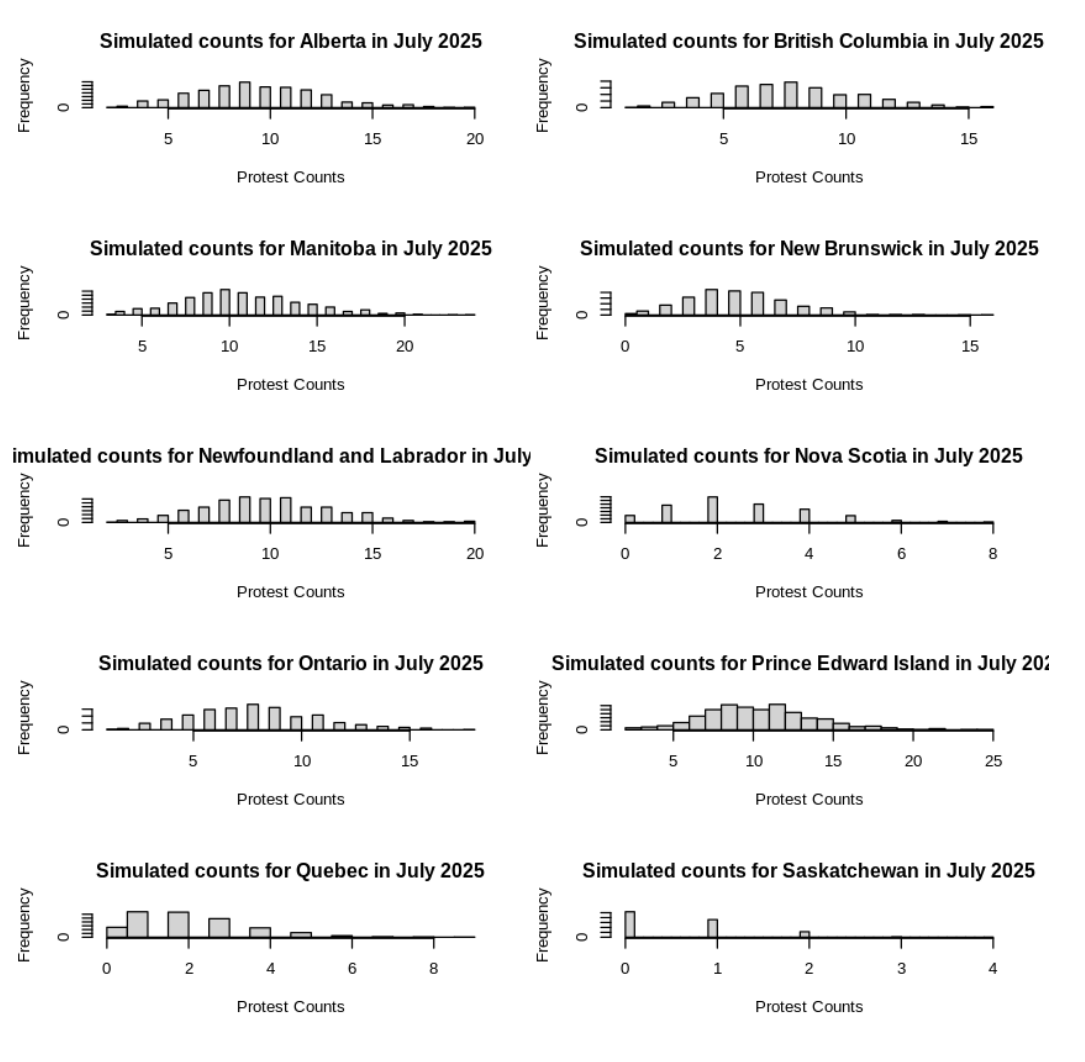

In [ ]:
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")
cat("\n")


--------------------
A boxplot is made to summarize our findings on one graph.

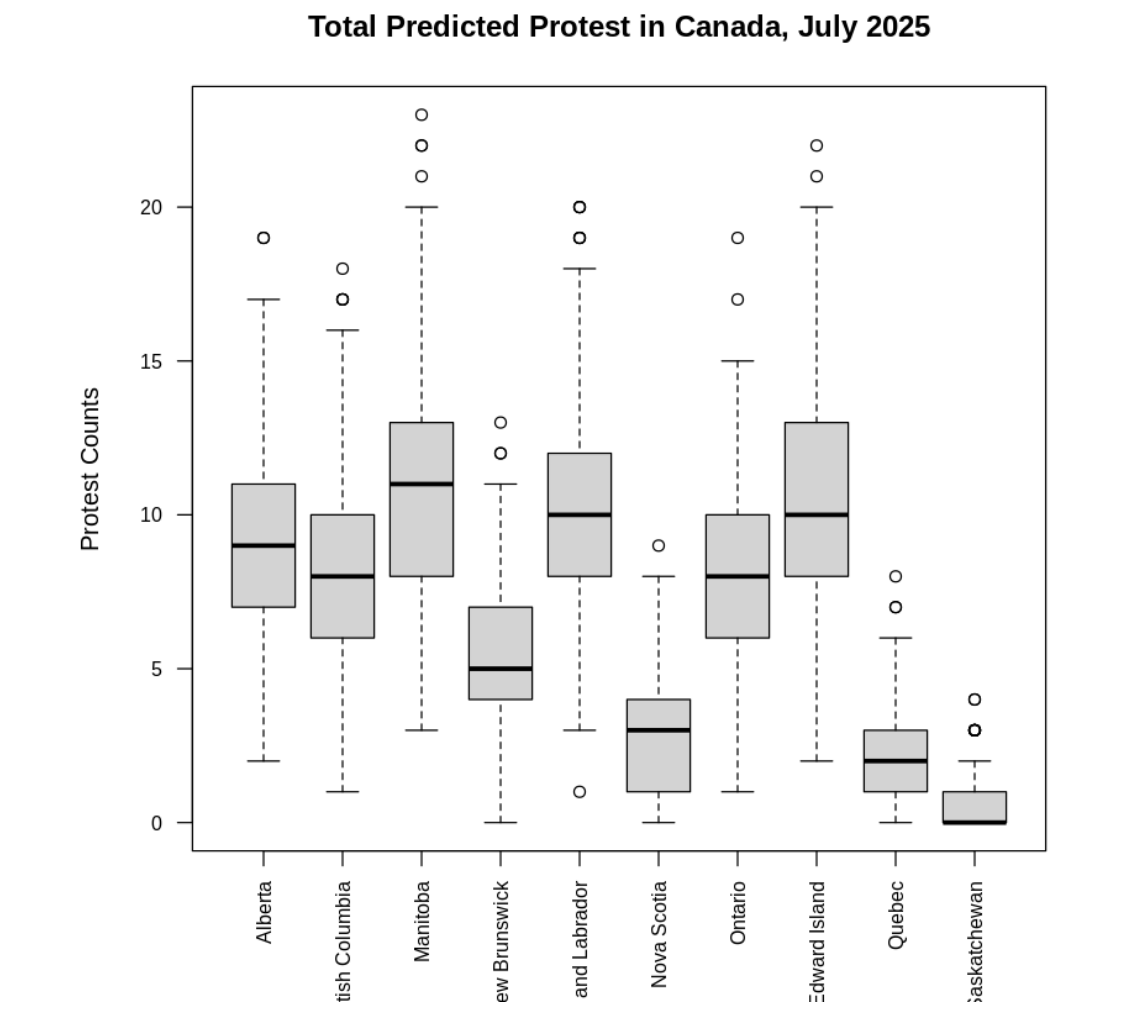

Based on the summary of findings for the predicted protests in July 2025, each province seems to have varying levels of predicted protest activity. Here's a breakdown of the observations:

- Alberta: Predicted protests range from 4 to 16, with a mean of approximately 9.3.
- British Columbia: Predicted protests range from 3 to 14, with a mean of around 8.
- Manitoba: Predicted protests range from 5 to 18, with a mean close to 10.7.
- New Brunswick: Predicted protests range from 2 to 10, with a mean of about 5.2.
- Newfoundland and Labrador: Predicted protests range from approximately 4.5 to 16.5, with a mean close to 9.9.
- Nova Scotia: Predicted protests range from 0 to 6, with a mean of about 2.6.
- Ontario: Predicted protests range from 3 to 14, with a mean close to 8.
- Prince Edward Island: Predicted protests range from 5 to 17, with a mean close to 10.8.
- Quebec: Predicted protests range from 0 to 6, with a mean of approximately 2.3.
- Saskatchewan: Predicted protests range from 0 to 3, with a mean around 0.6.


From these results, it's evident that certain provinces, such as Manitoba and Prince Edward Island, exhibit higher predicted protest counts compared to others like Nova Scotia and Saskatchewan. The predicted protest counts vary based on factors such as population size, historical data trends, and possibly other unobserved variables specific to each province. These insights could be valuable for understanding and potentially addressing social or political tensions across different regions of Canada.

As a final point, we see that  Monte Carlo sampling helps us understand how certain or uncertain our predictions are by trying out lots of different scenarios. This helps us see how our data and our model might vary. We use it to figure out a range where we think the actual values might fall, like the 95% bounds we calculated. But there are some things to watch out for. First, our predictions are only as good as the data we used to make them. If our data isn't very good, our predictions might not be either. Second, the assumptions we make when using our model might not always be true in real life. For example, we might assume that certain things are related in a certain way, but that might not be the case. Finally, Monte Carlo sampling assumes that we know all the details of our model perfectly, which might not be true in practice. So, while it's a useful tool, we need to be careful when interpreting the results and remember the limitations of both our model and our data. One of these assumptions is that the variation in our data is consistent across all levels of our predictors, which is called equidispersion. However, this might not always hold true in real-world situations.Additionally, i Incorporati ang cross-validation techniques can enhance the reliability and generalizability of the predictions in this project. Cross-validation involves splitting the dataset into multiple subsets, training the model on a portion of the data, and then evaluating its performance on the remaining unseen data. This process helps assess how well the model performs on new data and can provide insights into its robustness and potential for overfitting.

This research process has been both rewarding and insightful. Through the application of statistical techniques and data analysis, we have gained valuable insights into the dynamics of protest activity in Canada, laying the groundwork for further exploration and refinement of predictive models in this domain. Moving forward, continued efforts to improve model accuracy and robustness will be essential for enhancing the utility of such predictions in informing decision-making and policy development. Overall, our study underscores the complexity of modeling social phenomena like protests, while also highlighting the potential benefits of employing rigorous statistical methods to better understand and anticipate these dynamics.